In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from scipy.stats import zscore

In [2]:
# Read the datafile and load into a dataframe customer_details1
customer_details1 = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
# Checking the total na values in the dataset
customer_details1.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [4]:
# Checking the total null values in the dataset
customer_details1.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
# Finding the datatype of each label in the dataset
customer_details1.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
# Finding the numbers of rows and columns in the dataframe
customer_details1.shape

(5000, 14)

In [7]:
category_columns = ['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
customer_details1[category_columns] = customer_details1[category_columns].astype('category')

# Family is a discrete variable, and the avg, mean, std and other metrics of this data, would provide a decimal value., which is
# not a valid/meaningful value. Hence converting this to of type category

# Similarly we convert the other columns 

In [8]:
customer_details1.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [9]:
customer_details1.describe().transpose()

#Some columns have float values, which has no meaning in real life
#For example, the ID, Age, ZIPCode, Family, Education has float values
#These columns has to be further analysed to verify whether these affects the target column
#If the columns have no effect on the target column, we can consider dropping the column/columns

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0


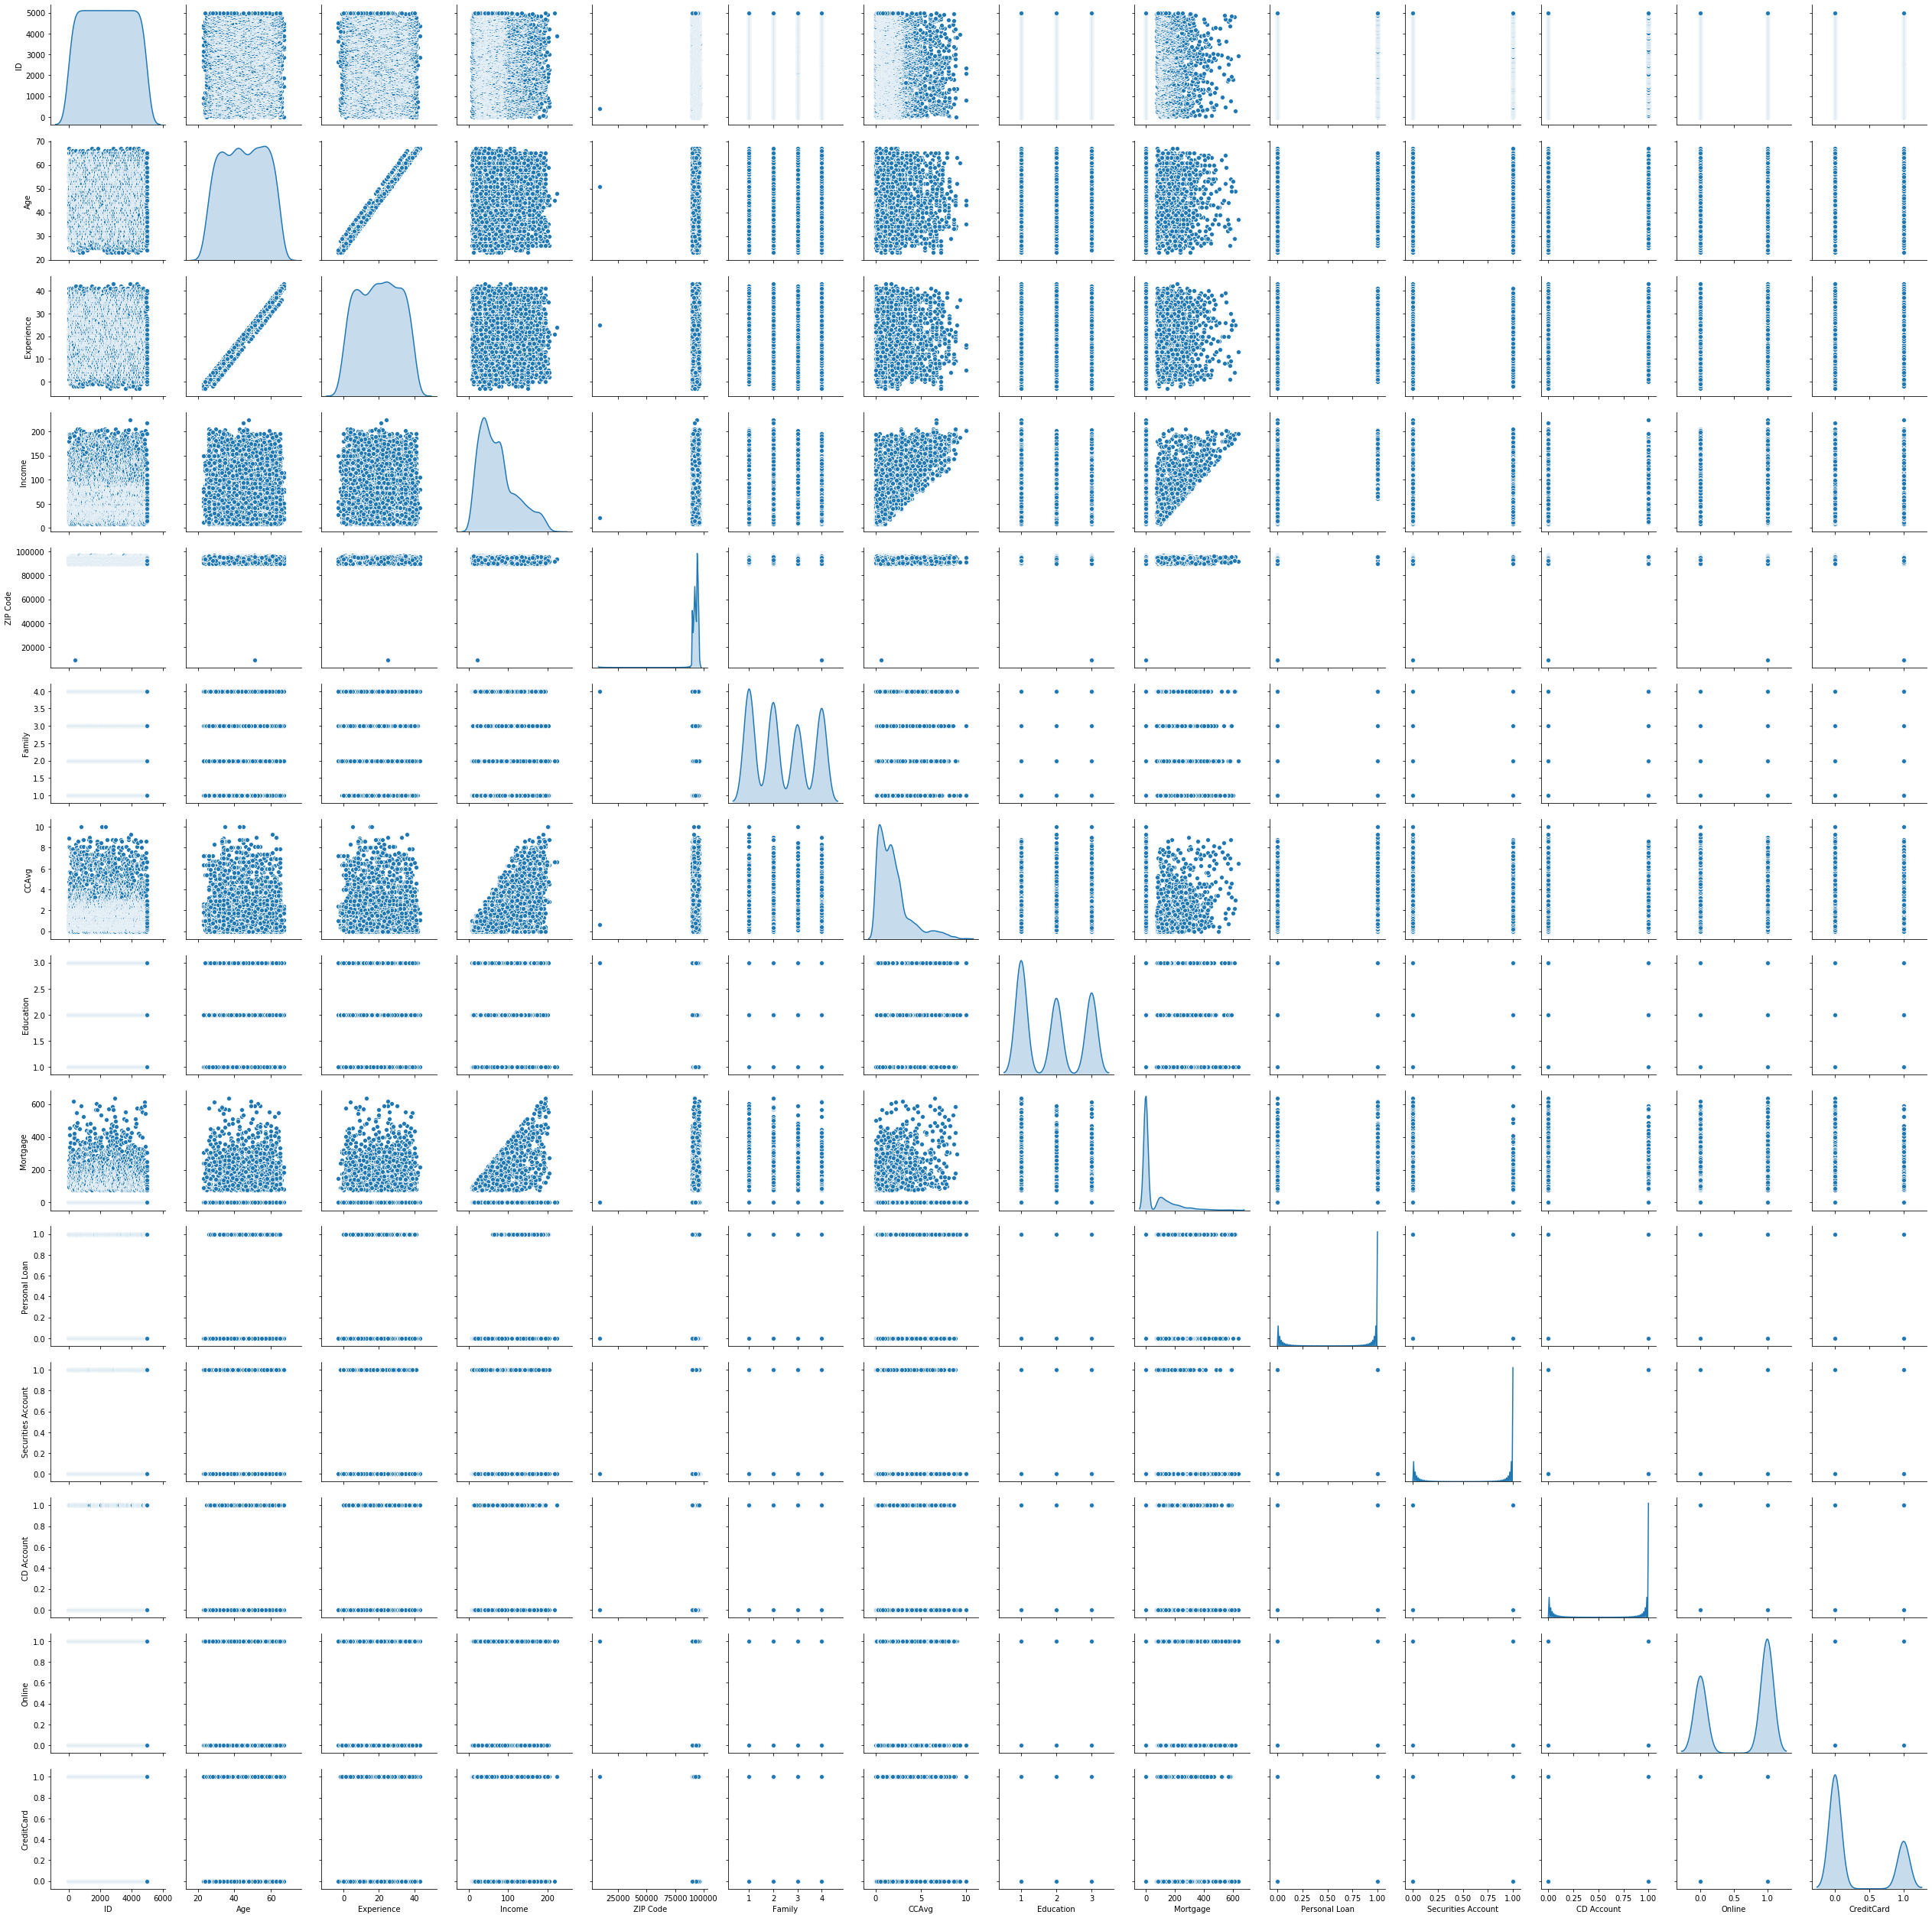

In [26]:
sns.pairplot(customer_details1,diag_kind='kde')

#Average spending of credit card per month is skewed towards the left. i.e more persons are spending in the smaller margin category

#Similary the Mortgage columns has left skewed data, i.e almost zero persons having a big house as a mortgage, and there are many data with a small budjet home mortgage

#The columns Personal Loan Customers, CreditCardOwners, Customers with NetBanking,
#Certificate Of Deposit Account Holders, Securities account have biased data count in Yes and No Classification

In [10]:
Personal_Loan_Bias = customer_details1['Personal Loan'].value_counts(normalize = True )
SecuritiesAccount_Bias = customer_details1['Securities Account'].value_counts(normalize = True )
CDAccount_Bias = customer_details1['CD Account'].value_counts(normalize = True )
OnlineBanking_Bias = customer_details1['Online'].value_counts(normalize = True )
CreditCard_Bias = customer_details1['CreditCard'].value_counts(normalize = True )

print (Personal_Loan_Bias)
print (SecuritiesAccount_Bias)
print (CDAccount_Bias)
print (OnlineBanking_Bias)
print (CreditCard_Bias)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64
0    0.8956
1    0.1044
Name: Securities Account, dtype: float64
0    0.9396
1    0.0604
Name: CD Account, dtype: float64
1    0.5968
0    0.4032
Name: Online, dtype: float64
0    0.706
1    0.294
Name: CreditCard, dtype: float64


In [11]:
# Creating another dataframe and clone the existing df to this, as we will be dropping some columns from the dataframe
customer_details = customer_details1
customer_details.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [12]:
# Dropping the ID column, as we can see there are no gaps in ID column from 0 to 5000
# And also, there are no sudden jumps in ID for both NonPersonalLoan and Personal Loan customers

# Similarly Zipcode column can be droppped. But still there are people holding account from a particular range of zipcode
# And from a certain zipcode very few people hold account with this bank
# Either further data has to be collected from this particular bank branch, or else more marketing has to be done to lure people
# to open account in the branch. This would provide more insights on how people from each region view the personal loan
# And also this insight can help us realise do we need any more lables in this dataframe to better predict the personal loan customers

customer_details.drop(columns=['ID','ZIP Code'],inplace = True)


In [13]:
customer_details.dtypes

Age                      int64
Experience               int64
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [14]:
customer_details.groupby(['Personal Loan']).count()

# Most are customers who do not opt for personal loan. The ratio is almost 10:1 in favor for class 0.  The model's ability to
#  predict class 0 will be better than predicting class 1. But ofcourse we will have this bias in real life

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480


In [15]:
# Set Personal column as dependent variable
# Set other columns as independent variables

X = customer_details.drop(columns=['Personal Loan'])
y = customer_details.iloc[:,7]

test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = tts(X, y, test_size=test_size, random_state=seed)

In [16]:
# Fit the model on 30%
Logisticmodel = LogisticRegression()
Logisticmodel.fit(X_train, y_train)
y_predict = Logisticmodel.predict(X_test)

C:\Users\srith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
model_score = Logisticmodel.score(X_test, y_test)
print(model_score * 100)

94.53333333333333


In [18]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Personal Loan,,
0,1333,18
1,64,85


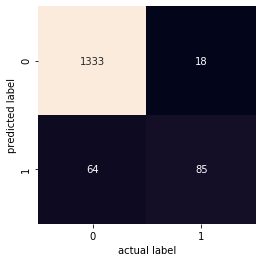

In [19]:
Confuse_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(Confuse_matrix, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=True,yticklabels=True)
plt.xlabel('actual label')
plt.ylabel('predicted label');

# Precision and Recall for Personal Loan Customers

In [20]:
TP_1 = Confuse_matrix[1][1]
FP_1 = Confuse_matrix[0][1]
FN_1 = Confuse_matrix[1][0]

TP_0 = Confuse_matrix[0][0]
FP_0 = Confuse_matrix[1][0]
FN_0 = Confuse_matrix[0][1]


precision_1= TP_1/(TP_1 + FP_1)
recall_1= TP_1/(TP_1 + FN_1)

print ("Precision for Personal Loan Buyer of logistic regression model is "+str(precision_1))
print ("Recall for Personal Loan Buyer of logistic regression model is "+str(recall_1))

f1score_1 = round((2*precision_1*recall_1)/(precision_1+recall_1),3)

print ("Score for Personal Loan Buyer of logistic regression model is "+str(f1score_1))


# Precision is 83 Percent , which means model is 83 percent correct on predicting Personal Loan customers as Personal Loan 
# customers

# Recall is 57 percent, which means out of all personal loan customers in the dataset,  57 percent of them
# are identified as personal loan customers


Precision for Personal Loan Buyer of logistic regression model is 0.8252427184466019
Recall for Personal Loan Buyer of logistic regression model is 0.5704697986577181
Score for Personal Loan Buyer of logistic regression model is 0.675


# Precision and Recall for Non Personal Loan Customers

In [21]:
precision_0= TP_0/(TP_0 + FP_0)
recall_0= TP_0/(TP_0 + FN_0)

print ("Precision for Non Personal Loan Buyer of logistic regression model is "+str(precision_0))
print ("Recall for Non Personal Loan Buyer of logistic regression model is "+str(recall_0))

f1score_0 = round((2*precision_0*recall_0)/(precision_0+recall_0),3)

print ("Score for Personal Loan Buyer of logistic regression model is "+str(f1score_0))

# Precision is 95 Percent , which means model is 95 percent correct on predicting Non Personal Loan customers as Non Personal Loan 
# customers

# Recall is almost 99 percent, which means out of all Non personal loan customers in the dataset, almost 99 percent of them
# are identified as non personal loan customers

Precision for Non Personal Loan Buyer of logistic regression model is 0.9541875447387258
Recall for Non Personal Loan Buyer of logistic regression model is 0.9866765358993338
Score for Personal Loan Buyer of logistic regression model is 0.97


# Comments on using model created by Logistic Regression

In [22]:
# Logistic Regression model for customers not preferring a personal loan gives a f1 score of 97 percent, 
# which is very high to predict the decision of customers to not get personal loan from the bank. This is obvious as we had 90 percent of data opting "No Personal Loan"

# Logistic Regression model for customers preferring a personal loan gives a f1 score of 68 percent, 
# which is low to predict the decision of customers to get personal loan from the bank. 

print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.83      0.57      0.67       149

    accuracy                           0.95      1500
   macro avg       0.89      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500



# Predict the PersonalLoan Model using Naive Bayes Classifier

In [23]:
X_NB = customer_details.drop(columns=['Personal Loan'])
y_NB = customer_details.iloc[:,7]

X_train_NB, X_test_NB, y_train_NB, y_test_NB = tts(X_NB, y_NB, test_size=test_size, random_state=seed)

In [24]:
# Fit the model on 30%
NaiveBayesmodel = GaussianNB()
NaiveBayesmodel.fit(X_train_NB, y_train_NB)
y_predict_NB = NaiveBayesmodel.predict(X_test_NB)

model_score_NB = NaiveBayesmodel.score(X_test_NB, y_test_NB)
print(model_score_NB * 100)

87.46666666666667


In [25]:
pd.crosstab(y_test_NB,y_predict_NB)

col_0,0,1
Personal Loan,,
0,1228,123
1,65,84


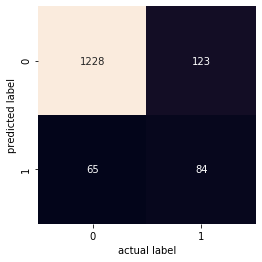

In [26]:
Confuse_matrix_NB = confusion_matrix(y_test_NB, y_predict_NB)
sns.heatmap(Confuse_matrix_NB, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=True,yticklabels=True)
plt.xlabel('actual label')
plt.ylabel('predicted label');

#Precision and Recall for Personal Loan customer using NaiveBayes

In [27]:
TP_1_NB = Confuse_matrix_NB[1][1]
FP_1_NB = Confuse_matrix_NB[0][1]
FN_1_NB = Confuse_matrix_NB[1][0]

TP_0_NB = Confuse_matrix_NB[0][0]
FP_0_NB = Confuse_matrix_NB[1][0]
FN_0_NB = Confuse_matrix_NB[0][1]


precision_1_NB= TP_1_NB/(TP_1_NB + FP_1_NB) 
recall_1_NB= TP_1_NB/(TP_1_NB + FN_1_NB)

print ("Precision for Personal Loan Buyer of NaiveBayes Gaussian regression model is "+str(precision_1_NB))
print ("Recall for Personal Loan Buyer of NaiveBayes Gaussian regression model is "+str(recall_1_NB))

f1score_1_NB = round((2*precision_1_NB*recall_1_NB)/(precision_1_NB+recall_1_NB),3)

print ("Score for Personal Loan Buyer of NaiveBayes Gaussian regression model is "+str(f1score_1_NB))


# Precision is 40 Percent , which means model is 40 percent correct on predicting Personal Loan customers as Personal Loan 
# customers

# Recall is almost 56 percent, which means out of all Personal loan customers in the dataset, only 56 percent of them are
# identified as personal loan customers

Precision for Personal Loan Buyer of NaiveBayes Gaussian regression model is 0.4057971014492754
Recall for Personal Loan Buyer of NaiveBayes Gaussian regression model is 0.5637583892617449
Score for Personal Loan Buyer of NaiveBayes Gaussian regression model is 0.472


#Precision and Recall for Non Personal Loan customer using NaiveBayes

In [28]:
precision_0_NB= TP_0_NB/(TP_0_NB + FP_0_NB)
recall_0_NB= TP_0_NB/(TP_0_NB + FN_0_NB)

print ("Precision for Non Personal Loan Buyer of NaiveBayes Gaussian regression model is "+str(precision_0_NB))
print ("Recall for Non Personal Loan Buyer of NaiveBayes Gaussian regression model is "+str(recall_0_NB))

f1score_0_NB = round((2*precision_0_NB*recall_0_NB)/(precision_0_NB+recall_0_NB),3)

print ("Score for Personal Loan Buyer of NaiveBayes Gaussian regression model is "+str(f1score_0_NB))

# Precision is nearly 95 Percent , which means model is 95 percent correct on predicting Non Personal Loan customers as Non Personal Loan 
# customers

# Recall is almost nearly 91 percent, which means out of all Non Personal loan customers in the dataset, 91 percent of them are
# identified as personal loan customers

print("\n"+metrics.classification_report(y_test_NB,y_predict_NB))

Precision for Non Personal Loan Buyer of NaiveBayes Gaussian regression model is 0.9497293116782676
Recall for Non Personal Loan Buyer of NaiveBayes Gaussian regression model is 0.9089563286454478
Score for Personal Loan Buyer of NaiveBayes Gaussian regression model is 0.929

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.56      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



# Build a Model using KNN

In [23]:
# Finding the Best Kvalue and corresponding metrics

In [29]:
# Function to find the best k value
column_array =customer_details.columns  # Adding column names from dataframe to this array
k_array = [] # Creating a k value array to create list of k values which can be used to find the best nearest neighbor
for i in range(1,column_array.size):
    k_array.append(i)

X_train_knn, X_test_knn, y_train_knn, y_test_knn = tts(X, y, test_size=test_size, random_state=seed) 
BestKValue = 0; # To store the best k value in this variable, after comparing the accuracy score using each k value 
BestScore = 0; # To store the best accuracy score using the best k value
BestMetric = "" # To store the best metric method used for calculating distance
metrics_values = ['euclidean','manhattan','chebyshev','minkowski'] # Create array to hold the metric values
Best_yPredict_knn = pd.DataFrame() 
# Create a empty dataframe. This will have the best ypredict, using the best k value and
# best metric method

#This step creates 6 empty string values for comparing the precison, recall and f1 score with each iteration with the already
# obtained best precison, recall and f1 score of logistic regression model
BestPersonalLoanPrecision_knn, BestPersonalLoanRecall_knn, BestPersonalLoanF1Score_knn, BestNonPersonalLoanPrecision_knn,BestNonPersonalLoanRecall_knn, BestNonPersonalLoanF1Score_knn = [""]*6


# Create a method which returns the best predicted value using the best neighbour and metric method

def BestNeighbour(X_train, X_test, y_train, y_test,k_array,metrics_values,BestKValue,BestScore,Best_yPredict_knn,BestPersonalLoanPrecision_knn,BestPersonalLoanRecall_knn,BestPersonalLoanF1Score_knn,BestNonPersonalLoanPrecision_knn,BestNonPersonalLoanRecall_knn,BestNonPersonalLoanF1Score_knn):
    for metrics_method in metrics_values: # Looping through each metric method
        for kvalue in k_array: #k_array has the kvalues from 1 to number of columns in dataframe
            knn = KNeighborsClassifier(n_neighbors = kvalue,metric = metrics_method) # Iterate kvalue and metric methods to find the best fit
            knn.fit(X_train,y_train)
            y_predict_knn = knn.predict(X_test)
            model_score_knn = round(knn.score(X_test, y_test),3)
            
            Confuse_matrix_KNN = confusion_matrix(y_test_knn, y_predict_knn)
            
            TP_1_KNN = Confuse_matrix_KNN[1][1]
            FP_1_KNN = Confuse_matrix_KNN[0][1]
            FN_1_KNN = Confuse_matrix_KNN[1][0]

            TP_0_KNN = Confuse_matrix_KNN[0][0]
            FP_0_KNN = Confuse_matrix_KNN[1][0]
            FN_0_KNN = Confuse_matrix_KNN[0][1]

            # Calculating the precision, recall and f1 score for Class 0 and Class 1 Category
            # Compare the results with the corresponding existing best score of logistic regression
            # Store the value if knn metric is the best, else it will remain empty
            
            precision_1_KNN= round(TP_1_KNN/(TP_1_KNN + FP_1_KNN) ,3)
            if(precision_1_KNN>=precision_1):
                BestPersonalLoanPrecision_knn = str(precision_1_KNN)+" using "+str(metrics_method)+" and its kvalue "+str(kvalue)
                
            recall_1_KNN= round(TP_1_KNN/(TP_1_KNN + FN_1_KNN),3)
            if(recall_1_KNN>=recall_1):
                BestPersonalLoanRecall_knn = str(recall_1_KNN)+" using "+str(metrics_method)+" and its kvalue "+str(kvalue)

            f1score_1_KNN = round((2*precision_1_KNN*recall_1_KNN)/(precision_1_KNN+recall_1_KNN),3)
            if(f1score_1_KNN>=f1score_1):
                BestPersonalLoanF1Score_knn = str(f1score_1_KNN)+" using "+str(metrics_method)+" and its kvalue "+str(kvalue)
            
            precision_0_KNN= round(TP_0_KNN/(TP_0_KNN + FP_0_KNN),3)
            if(precision_0_KNN>=precision_0):
                BestNonPersonalLoanPrecision_knn = str(precision_0_KNN)+" using "+str(metrics_method)+" and its kvalue "+str(kvalue)
                
            recall_0_KNN= round(TP_0_KNN/(TP_0_KNN + FN_0_KNN),3)
            if(recall_0_KNN>=recall_0):
                BestNonPersonalLoanRecall_knn = str(recall_0_KNN)+" using "+str(metrics_method)+" and its kvalue "+str(kvalue)

            f1score_0_KNN = round((2*precision_0_KNN*recall_0_KNN)/(precision_0_KNN+recall_0_KNN),3)
            if(f1score_0_KNN>=f1score_0):
                BestNonPersonalLoanF1Score_knn = str(f1score_0_KNN)+" using "+str(metrics_method)+" and its kvalue "+str(kvalue)
            
            # Compare the score obtained in each step with the logistic regression score
            # If the knn scores better, that k value and metric method , & the ypredict values are stored in each variable
            if(model_score_knn>BestScore):
                BestScore = model_score_knn
                BestKValue = kvalue
                BestMetric = metrics_method
                Best_yPredict_knn = y_predict_knn
    
    # If any knn iteration provided a better result, then we display that, else we display which is best
    if(BestPersonalLoanPrecision_knn==""):
        BestPersonalLoanPrecision_knn = "Precision of Logistic Regression "+str(precision_1)+" is better than any metric method in KNN"
    
    if(BestPersonalLoanRecall_knn==""):
        BestPersonalLoanRecall_knn = "Recall of Logistic Regression "+str(recall_1)+" is better than any metric method in KNN"
    
    if(BestPersonalLoanF1Score_knn==""):
        BestPersonalLoanF1Score_knn = "F1 Score of Logistic Regression "+str(f1score_1)+" is better than any metric method in KNN"
        
    if(BestNonPersonalLoanPrecision_knn==""):
        BestNonPersonalLoanPrecision_knn = "Precision of Logistic Regression "+str(precision_0)+" is better than any metric method in KNN"
    
    if(BestNonPersonalLoanRecall_knn==""):
        BestNonPersonalLoanRecall_knn = "Recall of Logistic Regression "+str(recall_0)+" is better than any metric method in KNN"
    
    if(BestNonPersonalLoanF1Score_knn==""):
        BestNonPersonalLoanF1Score_knn = "F1 Score of Logistic Regression "+str(f1score_0)+" is better than any metric method in KNN"
    
    # Printing the best metric method and the best k value
    print("Best Metric Method and Kvalue with their corresponding accuracy score using KNN is "+BestMetric+","+str(BestKValue)+","+str(BestScore)+"\n")
    print("Best Precision, Recall and f1score for Predicting Personal Loan customers using KNN and their corresponding Kvalue and metric method is : \n"+"\nBestPrecision_KNN for PersonalLoan - "+BestPersonalLoanPrecision_knn+".\nBest Recall KNN for PersonalLoan- "+BestPersonalLoanRecall_knn+".\nBest F1Score KNN for Personal Loan - "+BestPersonalLoanF1Score_knn+"\n")
    print("Best Precision, Recall and f1score for Predicting Non Personal Loan customers using KNN and their corresponding Kvalue and metric method is : \n"+"\nBestPrecison KNN for NonPersonalLoan - "+BestNonPersonalLoanPrecision_knn+".\nBestRecall KNN for NonPersonalLoan - "+BestNonPersonalLoanRecall_knn+".\nBestF1Score KNN for NonPersonalLoan - "+BestNonPersonalLoanF1Score_knn)
    return (Best_yPredict_knn) # return the best predicted values
        
BestyPredict_KNN = BestNeighbour(X_train_knn,X_test_knn,y_train_knn,y_test_knn,k_array,metrics_values,BestKValue,BestScore,Best_yPredict_knn,BestPersonalLoanPrecision_knn,BestPersonalLoanRecall_knn,BestPersonalLoanF1Score_knn,BestNonPersonalLoanPrecision_knn,BestNonPersonalLoanRecall_knn,BestNonPersonalLoanF1Score_knn)

Best Metric Method and Kvalue with their corresponding accuracy score using KNN is manhattan,5,0.927

Best Precision, Recall and f1score for Predicting Personal Loan customers using KNN and their corresponding Kvalue and metric method is : 

BestPrecision_KNN for PersonalLoan - Precision of Logistic Regression 0.8252427184466019 is better than any metric method in KNN.
Best Recall KNN for PersonalLoan- Recall of Logistic Regression 0.5704697986577181 is better than any metric method in KNN.
Best F1Score KNN for Personal Loan - F1 Score of Logistic Regression 0.675 is better than any metric method in KNN

Best Precision, Recall and f1score for Predicting Non Personal Loan customers using KNN and their corresponding Kvalue and metric method is : 

BestPrecison KNN for NonPersonalLoan - Precision of Logistic Regression 0.9541875447387258 is better than any metric method in KNN.
BestRecall KNN for NonPersonalLoan - 0.989 using manhattan and its kvalue 10.
BestF1Score KNN for NonPersonalLoa

In [30]:
# Confusion Matrix using the ypredict variable obtained from the best metric method in KNN

#print (BestyPredict_KNN)
print(pd.crosstab(y_test_knn,BestyPredict_KNN))

print("\n"+metrics.classification_report(y_test_knn,BestyPredict_KNN))

col_0             0   1
Personal Loan          
0              1327  24
1                85  64

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1351
           1       0.73      0.43      0.54       149

    accuracy                           0.93      1500
   macro avg       0.83      0.71      0.75      1500
weighted avg       0.92      0.93      0.92      1500



# Inference on choosing model for predicting the Customers decision to take personal loan

By seeing the accuracy score, we can see that logistic regression model has an accuracy score of 94.5, which is better than
Gaussian Model(87 percent) and KNN's manhattan (93 percent)

Since the dependent variable of the model has biased data, with too much data in customers opting for Non Personal loan,
other metrics such as Precision and Recall are needed

And again for precision, i.e model's ability to predict Personal customers as personal loan customers is best using Logistic Regression(83 Percent) .

For Recall, i,e model's ability to identify personal loan customers from the dataset as a personal loan customer is best using Logistic Regression model (57 percent). 

For F1 score, i.e the weighted average of Precision and Recall, the Logistic Regression model has outperformed and score 67.5 percent

This is less, and not a best model to put into production to predict customer decision to take personal loan with the bank

# Inference on choosing model for predicting the customers decision to not take personal loan

For precision, i.e model's ability to predict Non Personal customers as Non personal loan customers is best using Logistic
Regression(Almost 96(95.4) Percent) .

For Recall, i,e model's ability to identify personal loan customers from the dataset as a personal loan customer is best using
KNN Regression model using Manhattan Metric considering 10 nearest neighbors(99 percent). 

For F1 score, i.e the weighted average of Precision and Recall, the Logistic Regression model has outperformed
and score 97 percent

The Model when put into production will better predict the Non personal customers. This is true due to more Non Personal loan
customers data in the dataset. Either we need to get more data from many zipcodes, or collect extra information about
customer mentality to take personal loan, customers mentailty on taking loan from the specific bank, health condition
of family members, Marital status of siblings and the customer.